In [6]:
import pandas as pd
import regex as re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

Task 1

In [24]:
data = pd.read_csv('points.txt', names = ['X', 'y'], delimiter = '\s+')

In [25]:
train = data.sample(frac = 0.5, random_state= 42)
test = data.drop(train.index)
X_train, y_train = train["X"], train["y"]
X_test, y_test = test["X"], test["y"]

In [26]:
alpha = 2
beta = 25

design_matrix = np.c_[np.ones_like(X_train), X_train]
id_matrix = np.identity(2)

In [31]:
sigma = np.linalg.inv(alpha * id_matrix + beta * design_matrix.T @ design_matrix)
mu = beta * sigma @ design_matrix.T @ y_train

#sample w0 and w1
w = np.random.multivariate_normal(mu.ravel(), sigma,1).T
print(w)

[[0.06212056]
 [0.57024212]]


b

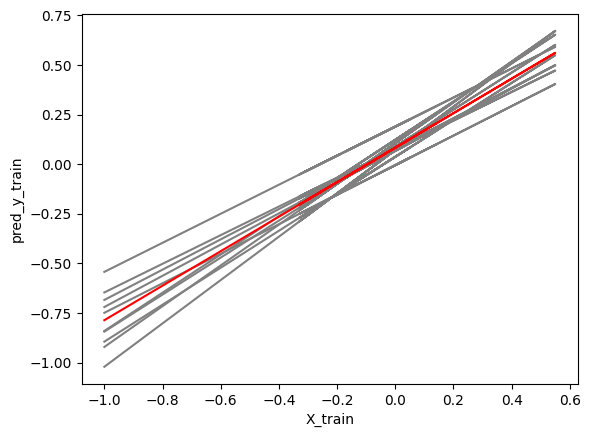

In [63]:
y_preds = []
for r in range(0, 10):
    w = np.random.multivariate_normal(mu.ravel(), sigma,1).T
    y = design_matrix @ w
    y_preds.append(y)
    plt.plot(X_train, y, color = "grey")
plt.plot(X_train, np.mean(y_preds, axis= 0), color = "red")
plt.xlabel("X_train")
plt.ylabel("pred_y_train")
plt.show()

c

In [60]:
y_preds_train = w[0] + w[1] * X_train
y_preds_test = w[0] + w[1] * X_test

d

In [62]:

def rmse(y_actual, y_predicted):
    return np.sqrt(np.mean((y_actual - y_predicted) ** 2)).round(3)

print(f"Train RMSE: {rmse(y_train, y_preds_train)} Test RMSE: {rmse(y_test, y_preds_test)}")

Train RMSE: 0.114 Test RMSE: 0.219


Task 2
a)

In [68]:
X = np.random.uniform(0, 1, 100).reshape(-1, 1)
sinu = np.sin(2 * np.pi * X) + np.random.normal(0, 0.3**2)

b)

In [75]:
# Parameters for the basis functions
sigma = 0.1  # Width of the basis functions
mu_values = np.linspace(0, 1, 9)

#compute vectors for each mu
vec_list = []
for mu in mu_values:
   vec = np.exp(-(X - mu) ** 2 / 2* sigma ** 2)
   vec_list.append(vec) 

#combine X and vecs in design matrix
matrix = np.hstack([X] + vec_list)
m_T = matrix.T

Task 3
a)

In [93]:
df = pd.read_csv('iris.csv', names=['v1', 'v2', 'v3', 'v4', 'y'])
df

,v1,v2,v3,v4,y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


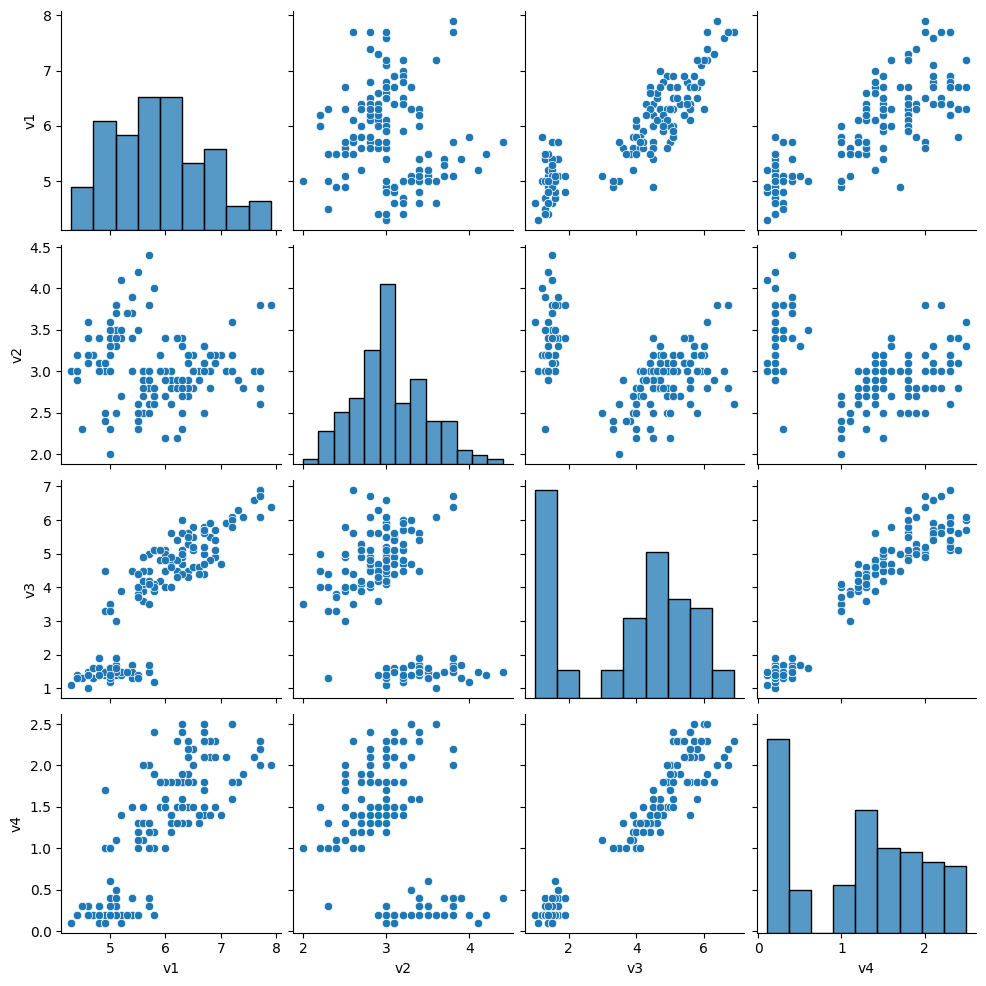

In [81]:
sns.pairplot(df)

b)

In [113]:
sort_df = df.sort_values(by ='y')
sort_df = sort_df.drop(columns= 'y')
cat1_df = sort_df.iloc[0:50]
cat2_df = sort_df.iloc[50:100]
cat3_df = sort_df.iloc[100:150]
mean_list = [cat1_df.mean().values, cat2_df.mean().values, cat3_df.mean().values]

In [117]:
mean_list[0]

array([5.006, 3.418, 1.464, 0.244])

c)

In [139]:
mat_list = []
for mean, data_frame in zip(mean_list, [cat1_df, cat2_df, cat3_df]):
    conv_mat = 1/50 * sum(np.array(data_frame.values - mean) @ np.array(data_frame.values - mean).T)
    mat_list.append(conv_mat)

d)

In [144]:
j_c_l = []
for conv in mat_list:
    j_c = sum(50/150 * conv)
    j_c_l.append(j_c)

e)

Task 4

- Usually due to a class imbalance. Precision and Recall can be looked into for a better metric.